<a href="https://colab.research.google.com/github/ntyulenev/machine-learning/blob/master/SimpleTestOnMNISTDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60000/60000 [==============================] - 18s 294us/sample - loss: 0.2206 - acc: 0.9343
Testing on the MNIST x_test dataset
10000/10000 [==============================] - 1s 126us/sample - loss: 0.1038 - acc: 0.9681
Recognition accuracy: 96%

Try to recognize digit by index: 1234
Digit: 8
Recognized as: 8


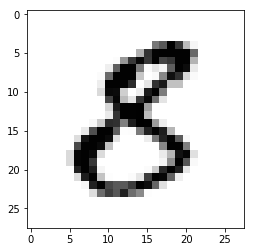

In [52]:
from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow library
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# loading data from the MNIST database
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

import matplotlib.pyplot as plt
%matplotlib inline 

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)
print('Testing on the MNIST x_test dataset')
res = model.evaluate(x_test, y_test)
print('Recognition accuracy: %d%%' % (res[1] * 100))

print('')
# ||||||||| change index between 0...9999 to test exact sample image
# VVVVVVVVV
image_index = 1234 # index
print('Try to recognize digit by index: %d' % image_index)
print('Digit: %d' % y_test[image_index]) 
plt.imshow(x_test[image_index], cmap='Greys')

pred = model.predict(x_test[image_index].reshape(1, 28, 28))
print('Recognized as: %d' % pred.argmax())